In [3]:
%pylab inline
import numpy as np
import yaml
from scipy.interpolate import interp1d
from scipy.optimize import leastsq
import spft as spft
from os.path import join

Populating the interactive namespace from numpy and matplotlib


/opt/quarantine/miniforge/envs/py3p9/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
in_dir = './testing/2022_06_test_right_only'
subs = ['Derek','Isa','Jhelum_L','Kimia','Mika']

for idx,sub in enumerate(subs):
    print(sub)
    data = spft.load_yaml(join(in_dir,f'LAB_{sub}_Test_Right_Only_out-file.txt'))
    LRN_lag = spft.score_spft_data(data)['all']['LRN']['lag_xcorr_ms']
    if idx == 0:
        all_LRN_lag = np.zeros((len(subs),LRN_lag.shape[0]))
    all_LRN_lag[idx,:] = LRN_lag

Derek
Isa
Jhelum_L
Kimia
Mika


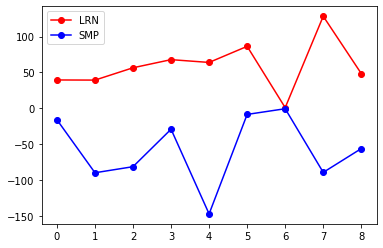

In [3]:
#ALL TRIALS WERE CODED AS "LRN" in this data, they need to be split up :-/
# SMP first, 3 trials, then LRN, then repeat
SMP_lag = all_LRN_lag[:,[0,1,2,6,7,8,12,13,14]]
LRN_lag = all_LRN_lag[:,[3,4,5,9,10,11,15,16,17]]
plt.plot(LRN_lag.mean(axis=0),'o-r',label='LRN')
plt.plot(SMP_lag.mean(axis=0),'o-b',label='SMP')
plt.legend()

In [33]:
## NEW DATA WITH MORE ACCURATE TIMINGS
in_dir = './testing/2022_06_test_right_only_new/'
subs = ['Lylou_L','Isadora_R','Jhelum_R','Kimia_R','Mika_R']

for idx,sub in enumerate(subs):
    print(sub)
    data = spft.load_yaml(join(in_dir,f'{sub}_Test_Right_Only_out-file.txt'))
    res = spft.score_spft_data(data)
    LRN_lag = res['all']['LRN']['lag_xcorr_ms']
    SMP_lag = res['all']['SMP']['lag_xcorr_ms']
    LRN_rmse = res['all']['LRN']['rmse']
    SMP_rmse = res['all']['SMP']['rmse']
    if idx == 0:
        all_LRN_lag = np.zeros((len(subs),len(LRN_lag)))
        all_SMP_lag = np.zeros((len(subs),len(SMP_lag)))
        all_LRN_rmse = np.zeros_like(all_LRN_lag)
        all_SMP_rmse = np.zeros_like(all_LRN_lag)
    all_LRN_lag[idx,:] = LRN_lag
    all_SMP_lag[idx,:] = SMP_lag
    all_LRN_rmse[idx,:] = LRN_rmse
    all_SMP_rmse[idx,:] = SMP_rmse

Lylou_L
Isadora_R
Jhelum_R
Kimia_R
Mika_R


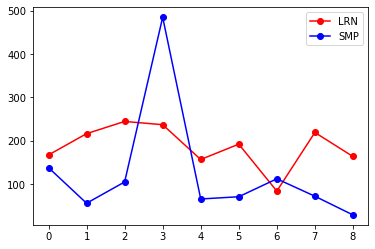

In [34]:

plt.plot(all_LRN_lag.mean(axis=0),'o-r',label='LRN')
plt.plot(all_SMP_lag.mean(axis=0),'o-b',label='SMP')
# plt.plot(SMP_lag.mean(axis=0),'o-b',label='SMP')
plt.legend()

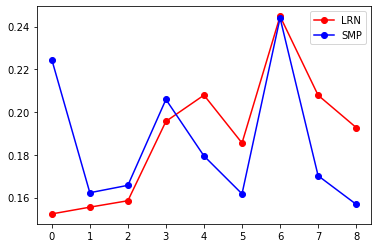

In [35]:

plt.plot(all_LRN_rmse.mean(axis=0),'o-r',label='LRN')
plt.plot(all_SMP_rmse.mean(axis=0),'o-b',label='SMP')
# plt.plot(SMP_lag.mean(axis=0),'o-b',label='SMP')
plt.legend()

In [37]:
all_SMP_lag[:,3]

array([ 362.15978812,   98.00775269, -171.54682876, 2048.29751651,
         85.59553317])

In [3]:
in_dir = './testing/2022_06_test_right_only_new/'
subs = ['Lylou_L','Isadora_R','Jhelum_R','Kimia_R','Mika_R']
subs = ['Kimia_R']

for idx,sub in enumerate(subs):
    print(sub)
    data = spft.load_yaml(join(in_dir,f'{sub}_Test_Right_Only_out-file.txt'))
    res = spft.score_spft_data(data)

Kimia_R


2048.2975165121006
335


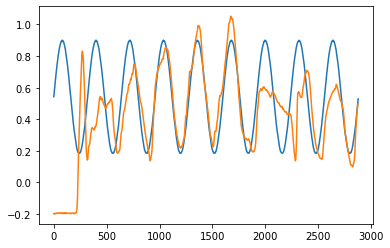

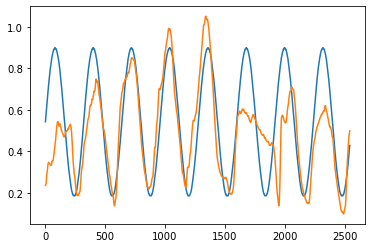

In [4]:
idx = 6
print(res['all']['SMP']['lag_xcorr_ms'][3])
v1 = res['trial_data']['ref_interp'][idx]
v2 = res['trial_data']['for_interp'][idx]
tc = res['trial_data']['common_time'][idx]
plt.plot(v1)
plt.plot(v2)

print(spft.lag_calc(v1,v2))
spft.lag_calc_ms(for_time,ref_vals_interp,for_vals,initial_guess=0)
plt.figure()
v1 = res['trial_data']['ref_interp_snipped'][idx]
v2 = res['trial_data']['for_interp_snipped'][idx]
plt.plot(v1)
plt.plot(v2)


In [7]:
spft.lag_calc_ms(tc,v1,v2,initial_guess=0)


ValueError: x and y arrays must be equal in length along interpolation axis.

In [79]:
res = score_spft_data(data,for_resp)
res['block_0']['LRN']
# res['all']['LRN']

{'lag_xcorr_ms': array([179.10000086, 155.09000087,  11.93000007]),
 'lag_lstsq_ms': array([186.44174009, 221.56072988, 167.68695811]),
 'raw_rmse': array([0.16097489, 0.19028802, 0.19996889]),
 'raw_sse': array([49.8823598 , 70.02922972, 76.65614733]),
 'rmse': array([0.12288733, 0.16698566, 0.19894812]),
 'sse': array([28.84347403, 53.56556581, 75.83595801])}

In [78]:
res.keys()

dict_keys(['sessionName', 'startTime', 'configurationFile', 'configurationChecksum', 'participantId', 'maximumLeftVoluntaryContraction', 'triggers', 'reference_designation', 'description', 'all', 'block_0', 'block_1'])

In [282]:
print(np.corrcoef(ref_vals_interp,np.interp(for_time+trial_lag_ms, for_time,for_vals))[0,1])
print(np.corrcoef(snipped_for_vals,snipped_ref_vals)[0,1])

0.7893307472790471
0.771862538169145


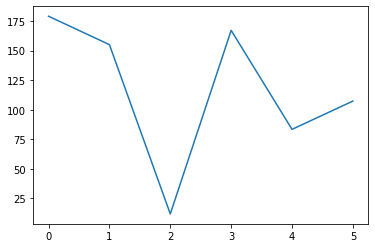

In [305]:
plt.plot(res['all']['lag_xcorr_ms'])

array([[1.        , 0.99756188],
       [0.99756188, 1.        ]])

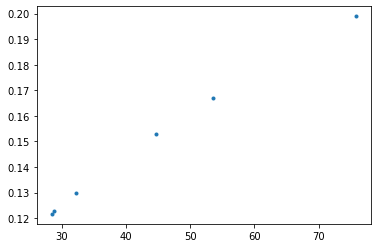

In [289]:
# plt.plot(raw_sse,sse,'.')
plt.plot(sse,rmse,'.')
np.corrcoef(sse,rmse)

array([[1.        , 0.59404239],
       [0.59404239, 1.        ]])

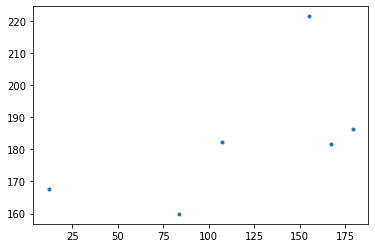

In [283]:
plt.plot(lag_xcorr_ms,lag_lstsq_ms,'.')
np.corrcoef(lag_xcorr_ms,lag_lstsq_ms)

0.0
22599.41000008583


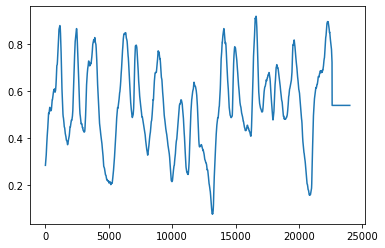

In [237]:
ff = interp1d(for_time,for_vals,kind='cubic',bounds_error=False,fill_value=np.mean(for_vals))
print(np.min(for_time))
print(np.max(for_time))

plt.plot(np.arange(0,24000,1),ff(np.arange(0,24000,1)))

(14000.0, 20000.0)

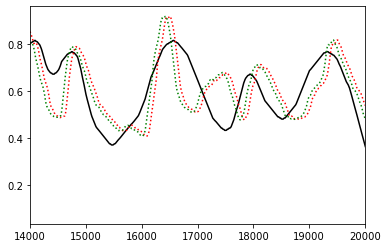

In [246]:
plt.figure()
plt.plot(for_time,ref_vals_interp,'k-',label='reference')
# plt.plot(for_time,for_vals,'b-',alpha=0.5, label='force')
# plt.plot(snipped_for_time,snipped_ref_vals,'k-',label='reference')
plt.plot(snipped_for_time-trial_lag_xcorr_ms,snipped_for_vals,'r:',label='aligned force')
plt.plot(snipped_for_time-trial_lag_ms,snipped_for_vals,'g:',label='aligned force')
plt.xlim(14000,20000)
# plt.ylim(0.6,1)

In [109]:
lag_calc_ms(for_time,ref_vals_interp,for_vals)

-82.44301786770032

In [63]:
ref_vals_interp.shape
snipped_ref_vals.shape
snipped_for_time

array([5.87298412e+08, 5.87298423e+08, 5.87298435e+08, ...,
       5.87321874e+08, 5.87321887e+08, 5.87321898e+08])

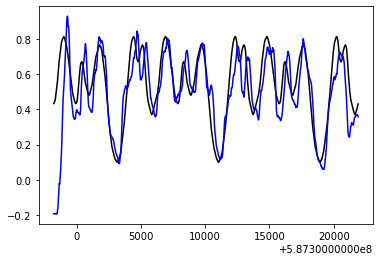

In [45]:
plt.figure()
plt.plot(for_time,ref_vals_interp,'k-',label='reference')
plt.plot(for_time,for_vals,'b-',label='force')
# plt.plot(snipped_for_time,snipped_for_vals,'r-',label='aligned force')

(1995,)
(1995,)


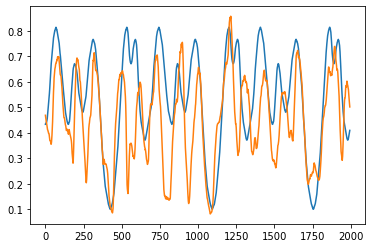

In [18]:


print(snipped_for_vals.shape)
print(snipped_ref_vals.shape)

plt.plot(snipped_ref_vals)
plt.plot(snipped_for_vals)
# for_vals.shape

[0]
[0.]
[0.]
[1.49011612e-08]
[-121.98935654]
[-121.98935472]
[-74.69475903]
[-74.69475792]
[-91.71327781]
[-91.71327781]
[-91.71327781]
[-82.10358687]
[-82.10358565]
[-82.81225896]
[-82.81225896]
[-82.81225896]
[-82.81225896]
[-82.4867231]
[-82.48672187]
[-82.40283754]
[-82.40283754]
[-82.40283754]
[-82.44301787]
[-82.44301664]
[-82.44928763]
-82.44301786770032
16


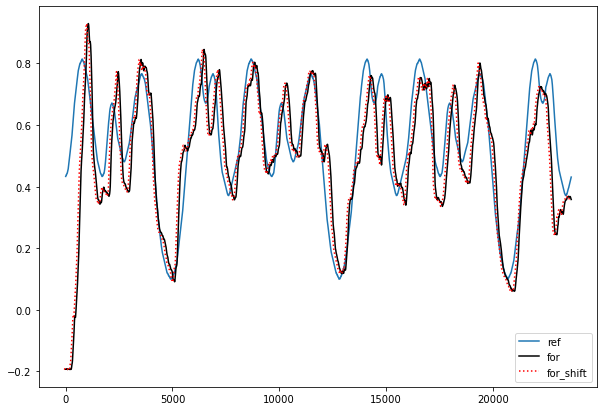

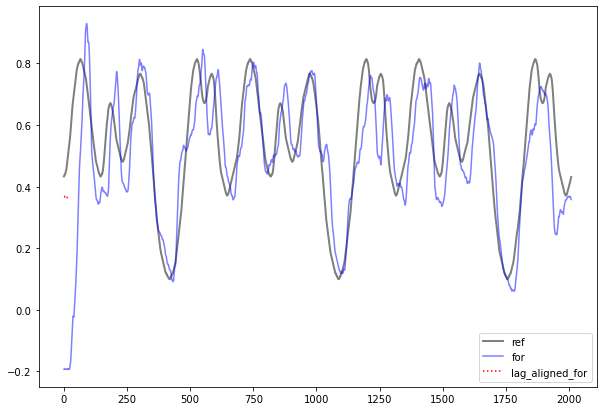

In [72]:
#bring the reference positions into the same time space as the force for direct comparison (linear interp)
# ref_vals_interp = np.interp(for_time,ref_time,ref_vals) #linear (piece-wise) interpolation of presented target bar positions into the actual response, now we can subtract directly

# # compute temporal lag
def err_func(p):
    print(p)
    return interp1d(for_time,ref_vals_interp,kind='cubic',fill_value="extrapolate")(for_time[1:-1]+p[0]) - for_vals[1:-1]

p0 = [0,] # Inital guess of no shift
found_shift = leastsq(err_func,p0)[0][0]
lag_xcorr = lag_calc(ref_vals_interp,for_vals)
print(found_shift)
print(lag_xcorr)

# lstsq approach
plt.figure(figsize=(10,7))
# plt.plot(ref_time,ref_vals,'.',label='ref_orig')
plt.plot(for_time,ref_vals_interp,label='ref')
plt.plot(for_time,for_vals,'k-',label='for')
plt.plot(for_time+found_shift,for_vals,'r:',label='for_shift')
plt.legend()

plt.figure(figsize=(10,7)) #xcorr approach
plt.plot(ref_vals_interp,'k-',linewidth=2,label='ref',alpha=0.5)
plt.plot(for_vals,'b-',label='for',alpha=0.5)
plt.plot(for_vals[lag_xcorr*-1:],'r:',label='lag_aligned_for')
plt.legend()

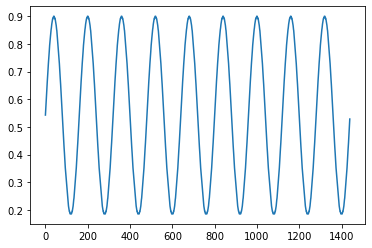

In [37]:
plt.plot([0.5429, 0.5571, 0.5667, 0.581, 0.5952, 0.6095, 0.6238, 0.6381, 0.6524, 0.6667, 0.6762, 0.6905, 0.7048, 0.7143, 0.7286, 0.7381, 0.7524, 0.7619, 0.7714, 0.7857, 0.7952, 0.8048, 0.8143, 0.819, 0.8286, 0.8381, 0.8476, 0.8524, 0.8571, 0.8667, 0.8714, 0.8762, 0.881, 0.8857, 0.8905, 0.8905, 0.8952, 0.8952, 0.8952, 0.9, 0.9, 0.9, 0.8952, 0.8952, 0.8952, 0.8905, 0.8905, 0.8857, 0.881, 0.8762, 0.8714, 0.8667, 0.8571, 0.8524, 0.8476, 0.8381, 0.8286, 0.819, 0.8143, 0.8048, 0.7952, 0.7857, 0.7714, 0.7619, 0.7524, 0.7381, 0.7286, 0.7143, 0.7048, 0.6905, 0.6762, 0.6667, 0.6524, 0.6381, 0.6238, 0.6095, 0.5952, 0.581, 0.5667, 0.5571, 0.5429, 0.5286, 0.5143, 0.5, 0.4857, 0.4714, 0.4571, 0.4429, 0.4286, 0.419, 0.4048, 0.3905, 0.381, 0.3667, 0.3524, 0.3429, 0.3333, 0.319, 0.3095, 0.3, 0.2905, 0.281, 0.2714, 0.2619, 0.2524, 0.2429, 0.2381, 0.2286, 0.2238, 0.2143, 0.2095, 0.2048, 0.2, 0.1952, 0.1952, 0.1905, 0.1905, 0.1857, 0.1857, 0.1857, 0.1857, 0.1857, 0.1857, 0.1857, 0.1905, 0.1905, 0.1952, 0.1952, 0.2, 0.2048, 0.2095, 0.2143, 0.2238, 0.2286, 0.2381, 0.2429, 0.2524, 0.2619, 0.2714, 0.281, 0.2905, 0.3, 0.3095, 0.319, 0.3333, 0.3429, 0.3524, 0.3667, 0.381, 0.3905, 0.4048, 0.419, 0.4286, 0.4429, 0.4571, 0.4714, 0.4857, 0.5, 0.5143, 0.5286, 0.5429, 0.5571, 0.5667, 0.581, 0.5952, 0.6095, 0.6238, 0.6381, 0.6524, 0.6667, 0.6762, 0.6905, 0.7048, 0.7143, 0.7286, 0.7381, 0.7524, 0.7619, 0.7714, 0.7857, 0.7952, 0.8048, 0.8143, 0.819, 0.8286, 0.8381, 0.8476, 0.8524, 0.8571, 0.8667, 0.8714, 0.8762, 0.881, 0.8857, 0.8905, 0.8905, 0.8952, 0.8952, 0.8952, 0.9, 0.9, 0.9, 0.8952, 0.8952, 0.8952, 0.8905, 0.8905, 0.8857, 0.881, 0.8762, 0.8714, 0.8667, 0.8571, 0.8524, 0.8476, 0.8381, 0.8286, 0.819, 0.8143, 0.8048, 0.7952, 0.7857, 0.7714, 0.7619, 0.7524, 0.7381, 0.7286, 0.7143, 0.7048, 0.6905, 0.6762, 0.6667, 0.6524, 0.6381, 0.6238, 0.6095, 0.5952, 0.581, 0.5667, 0.5571, 0.5429, 0.5286, 0.5143, 0.5, 0.4857, 0.4714, 0.4571, 0.4429, 0.4286, 0.419, 0.4048, 0.3905, 0.381, 0.3667, 0.3524, 0.3429, 0.3333, 0.319, 0.3095, 0.3, 0.2905, 0.281, 0.2714, 0.2619, 0.2524, 0.2429, 0.2381, 0.2286, 0.2238, 0.2143, 0.2095, 0.2048, 0.2, 0.1952, 0.1952, 0.1905, 0.1905, 0.1857, 0.1857, 0.1857, 0.1857, 0.1857, 0.1857, 0.1857, 0.1905, 0.1905, 0.1952, 0.1952, 0.2, 0.2048, 0.2095, 0.2143, 0.2238, 0.2286, 0.2381, 0.2429, 0.2524, 0.2619, 0.2714, 0.281, 0.2905, 0.3, 0.3095, 0.319, 0.3333, 0.3429, 0.3524, 0.3667, 0.381, 0.3905, 0.4048, 0.419, 0.4286, 0.4429, 0.4571, 0.4714, 0.4857, 0.5, 0.5143, 0.5286, 0.5429, 0.5571, 0.5667, 0.581, 0.5952, 0.6095, 0.6238, 0.6381, 0.6524, 0.6667, 0.6762, 0.6905, 0.7048, 0.7143, 0.7286, 0.7381, 0.7524, 0.7619, 0.7714, 0.7857, 0.7952, 0.8048, 0.8143, 0.819, 0.8286, 0.8381, 0.8476, 0.8524, 0.8571, 0.8667, 0.8714, 0.8762, 0.881, 0.8857, 0.8905, 0.8905, 0.8952, 0.8952, 0.8952, 0.9, 0.9, 0.9, 0.8952, 0.8952, 0.8952, 0.8905, 0.8905, 0.8857, 0.881, 0.8762, 0.8714, 0.8667, 0.8571, 0.8524, 0.8476, 0.8381, 0.8286, 0.819, 0.8143, 0.8048, 0.7952, 0.7857, 0.7714, 0.7619, 0.7524, 0.7381, 0.7286, 0.7143, 0.7048, 0.6905, 0.6762, 0.6667, 0.6524, 0.6381, 0.6238, 0.6095, 0.5952, 0.581, 0.5667, 0.5571, 0.5429, 0.5286, 0.5143, 0.5, 0.4857, 0.4714, 0.4571, 0.4429, 0.4286, 0.419, 0.4048, 0.3905, 0.381, 0.3667, 0.3524, 0.3429, 0.3333, 0.319, 0.3095, 0.3, 0.2905, 0.281, 0.2714, 0.2619, 0.2524, 0.2429, 0.2381, 0.2286, 0.2238, 0.2143, 0.2095, 0.2048, 0.2, 0.1952, 0.1952, 0.1905, 0.1905, 0.1857, 0.1857, 0.1857, 0.1857, 0.1857, 0.1857, 0.1857, 0.1905, 0.1905, 0.1952, 0.1952, 0.2, 0.2048, 0.2095, 0.2143, 0.2238, 0.2286, 0.2381, 0.2429, 0.2524, 0.2619, 0.2714, 0.281, 0.2905, 0.3, 0.3095, 0.319, 0.3333, 0.3429, 0.3524, 0.3667, 0.381, 0.3905, 0.4048, 0.419, 0.4286, 0.4429, 0.4571, 0.4714, 0.4857, 0.5, 0.5143, 0.5286, 0.5429, 0.5571, 0.5667, 0.581, 0.5952, 0.6095, 0.6238, 0.6381, 0.6524, 0.6667, 0.6762, 0.6905, 0.7048, 0.7143, 0.7286, 0.7381, 0.7524, 0.7619, 0.7714, 0.7857, 0.7952, 0.8048, 0.8143, 0.819, 0.8286, 0.8381, 0.8476, 0.8524, 0.8571, 0.8667, 0.8714, 0.8762, 0.881, 0.8857, 0.8905, 0.8905, 0.8952, 0.8952, 0.8952, 0.9, 0.9, 0.9, 0.8952, 0.8952, 0.8952, 0.8905, 0.8905, 0.8857, 0.881, 0.8762, 0.8714, 0.8667, 0.8571, 0.8524, 0.8476, 0.8381, 0.8286, 0.819, 0.8143, 0.8048, 0.7952, 0.7857, 0.7714, 0.7619, 0.7524, 0.7381, 0.7286, 0.7143, 0.7048, 0.6905, 0.6762, 0.6667, 0.6524, 0.6381, 0.6238, 0.6095, 0.5952, 0.581, 0.5667, 0.5571, 0.5429, 0.5286, 0.5143, 0.5, 0.4857, 0.4714, 0.4571, 0.4429, 0.4286, 0.419, 0.4048, 0.3905, 0.381, 0.3667, 0.3524, 0.3429, 0.3333, 0.319, 0.3095, 0.3, 0.2905, 0.281, 0.2714, 0.2619, 0.2524, 0.2429, 0.2381, 0.2286, 0.2238, 0.2143, 0.2095, 0.2048, 0.2, 0.1952, 0.1952, 0.1905, 0.1905, 0.1857, 0.1857, 0.1857, 0.1857, 0.1857, 0.1857, 0.1857, 0.1905, 0.1905, 0.1952, 0.1952, 0.2, 0.2048, 0.2095, 0.2143, 0.2238, 0.2286, 0.2381, 0.2429, 0.2524, 0.2619, 0.2714, 0.281, 0.2905, 0.3, 0.3095, 0.319, 0.3333, 0.3429, 0.3524, 0.3667, 0.381, 0.3905, 0.4048, 0.419, 0.4286, 0.4429, 0.4571, 0.4714, 0.4857, 0.5, 0.5143, 0.5286, 0.5429, 0.5571, 0.5667, 0.581, 0.5952, 0.6095, 0.6238, 0.6381, 0.6524, 0.6667, 0.6762, 0.6905, 0.7048, 0.7143, 0.7286, 0.7381, 0.7524, 0.7619, 0.7714, 0.7857, 0.7952, 0.8048, 0.8143, 0.819, 0.8286, 0.8381, 0.8476, 0.8524, 0.8571, 0.8667, 0.8714, 0.8762, 0.881, 0.8857, 0.8905, 0.8905, 0.8952, 0.8952, 0.8952, 0.9, 0.9, 0.9, 0.8952, 0.8952, 0.8952, 0.8905, 0.8905, 0.8857, 0.881, 0.8762, 0.8714, 0.8667, 0.8571, 0.8524, 0.8476, 0.8381, 0.8286, 0.819, 0.8143, 0.8048, 0.7952, 0.7857, 0.7714, 0.7619, 0.7524, 0.7381, 0.7286, 0.7143, 0.7048, 0.6905, 0.6762, 0.6667, 0.6524, 0.6381, 0.6238, 0.6095, 0.5952, 0.581, 0.5667, 0.5571, 0.5429, 0.5286, 0.5143, 0.5, 0.4857, 0.4714, 0.4571, 0.4429, 0.4286, 0.419, 0.4048, 0.3905, 0.381, 0.3667, 0.3524, 0.3429, 0.3333, 0.319, 0.3095, 0.3, 0.2905, 0.281, 0.2714, 0.2619, 0.2524, 0.2429, 0.2381, 0.2286, 0.2238, 0.2143, 0.2095, 0.2048, 0.2, 0.1952, 0.1952, 0.1905, 0.1905, 0.1857, 0.1857, 0.1857, 0.1857, 0.1857, 0.1857, 0.1857, 0.1905, 0.1905, 0.1952, 0.1952, 0.2, 0.2048, 0.2095, 0.2143, 0.2238, 0.2286, 0.2381, 0.2429, 0.2524, 0.2619, 0.2714, 0.281, 0.2905, 0.3, 0.3095, 0.319, 0.3333, 0.3429, 0.3524, 0.3667, 0.381, 0.3905, 0.4048, 0.419, 0.4286, 0.4429, 0.4571, 0.4714, 0.4857, 0.5, 0.5143, 0.5286, 0.5429, 0.5571, 0.5667, 0.581, 0.5952, 0.6095, 0.6238, 0.6381, 0.6524, 0.6667, 0.6762, 0.6905, 0.7048, 0.7143, 0.7286, 0.7381, 0.7524, 0.7619, 0.7714, 0.7857, 0.7952, 0.8048, 0.8143, 0.819, 0.8286, 0.8381, 0.8476, 0.8524, 0.8571, 0.8667, 0.8714, 0.8762, 0.881, 0.8857, 0.8905, 0.8905, 0.8952, 0.8952, 0.8952, 0.9, 0.9, 0.9, 0.8952, 0.8952, 0.8952, 0.8905, 0.8905, 0.8857, 0.881, 0.8762, 0.8714, 0.8667, 0.8571, 0.8524, 0.8476, 0.8381, 0.8286, 0.819, 0.8143, 0.8048, 0.7952, 0.7857, 0.7714, 0.7619, 0.7524, 0.7381, 0.7286, 0.7143, 0.7048, 0.6905, 0.6762, 0.6667, 0.6524, 0.6381, 0.6238, 0.6095, 0.5952, 0.581, 0.5667, 0.5571, 0.5429, 0.5286, 0.5143, 0.5, 0.4857, 0.4714, 0.4571, 0.4429, 0.4286, 0.419, 0.4048, 0.3905, 0.381, 0.3667, 0.3524, 0.3429, 0.3333, 0.319, 0.3095, 0.3, 0.2905, 0.281, 0.2714, 0.2619, 0.2524, 0.2429, 0.2381, 0.2286, 0.2238, 0.2143, 0.2095, 0.2048, 0.2, 0.1952, 0.1952, 0.1905, 0.1905, 0.1857, 0.1857, 0.1857, 0.1857, 0.1857, 0.1857, 0.1857, 0.1905, 0.1905, 0.1952, 0.1952, 0.2, 0.2048, 0.2095, 0.2143, 0.2238, 0.2286, 0.2381, 0.2429, 0.2524, 0.2619, 0.2714, 0.281, 0.2905, 0.3, 0.3095, 0.319, 0.3333, 0.3429, 0.3524, 0.3667, 0.381, 0.3905, 0.4048, 0.419, 0.4286, 0.4429, 0.4571, 0.4714, 0.4857, 0.5, 0.5143, 0.5286, 0.5429, 0.5571, 0.5667, 0.581, 0.5952, 0.6095, 0.6238, 0.6381, 0.6524, 0.6667, 0.6762, 0.6905, 0.7048, 0.7143, 0.7286, 0.7381, 0.7524, 0.7619, 0.7714, 0.7857, 0.7952, 0.8048, 0.8143, 0.819, 0.8286, 0.8381, 0.8476, 0.8524, 0.8571, 0.8667, 0.8714, 0.8762, 0.881, 0.8857, 0.8905, 0.8905, 0.8952, 0.8952, 0.8952, 0.9, 0.9, 0.9, 0.8952, 0.8952, 0.8952, 0.8905, 0.8905, 0.8857, 0.881, 0.8762, 0.8714, 0.8667, 0.8571, 0.8524, 0.8476, 0.8381, 0.8286, 0.819, 0.8143, 0.8048, 0.7952, 0.7857, 0.7714, 0.7619, 0.7524, 0.7381, 0.7286, 0.7143, 0.7048, 0.6905, 0.6762, 0.6667, 0.6524, 0.6381, 0.6238, 0.6095, 0.5952, 0.581, 0.5667, 0.5571, 0.5429, 0.5286, 0.5143, 0.5, 0.4857, 0.4714, 0.4571, 0.4429, 0.4286, 0.419, 0.4048, 0.3905, 0.381, 0.3667, 0.3524, 0.3429, 0.3333, 0.319, 0.3095, 0.3, 0.2905, 0.281, 0.2714, 0.2619, 0.2524, 0.2429, 0.2381, 0.2286, 0.2238, 0.2143, 0.2095, 0.2048, 0.2, 0.1952, 0.1952, 0.1905, 0.1905, 0.1857, 0.1857, 0.1857, 0.1857, 0.1857, 0.1857, 0.1857, 0.1905, 0.1905, 0.1952, 0.1952, 0.2, 0.2048, 0.2095, 0.2143, 0.2238, 0.2286, 0.2381, 0.2429, 0.2524, 0.2619, 0.2714, 0.281, 0.2905, 0.3, 0.3095, 0.319, 0.3333, 0.3429, 0.3524, 0.3667, 0.381, 0.3905, 0.4048, 0.419, 0.4286, 0.4429, 0.4571, 0.4714, 0.4857, 0.5, 0.5143, 0.5286, 0.5429, 0.5571, 0.5667, 0.581, 0.5952, 0.6095, 0.6238, 0.6381, 0.6524, 0.6667, 0.6762, 0.6905, 0.7048, 0.7143, 0.7286, 0.7381, 0.7524, 0.7619, 0.7714, 0.7857, 0.7952, 0.8048, 0.8143, 0.819, 0.8286, 0.8381, 0.8476, 0.8524, 0.8571, 0.8667, 0.8714, 0.8762, 0.881, 0.8857, 0.8905, 0.8905, 0.8952, 0.8952, 0.8952, 0.9, 0.9, 0.9, 0.8952, 0.8952, 0.8952, 0.8905, 0.8905, 0.8857, 0.881, 0.8762, 0.8714, 0.8667, 0.8571, 0.8524, 0.8476, 0.8381, 0.8286, 0.819, 0.8143, 0.8048, 0.7952, 0.7857, 0.7714, 0.7619, 0.7524, 0.7381, 0.7286, 0.7143, 0.7048, 0.6905, 0.6762, 0.6667, 0.6524, 0.6381, 0.6238, 0.6095, 0.5952, 0.581, 0.5667, 0.5571, 0.5429, 0.5286, 0.5143, 0.5, 0.4857, 0.4714, 0.4571, 0.4429, 0.4286, 0.419, 0.4048, 0.3905, 0.381, 0.3667, 0.3524, 0.3429, 0.3333, 0.319, 0.3095, 0.3, 0.2905, 0.281, 0.2714, 0.2619, 0.2524, 0.2429, 0.2381, 0.2286, 0.2238, 0.2143, 0.2095, 0.2048, 0.2, 0.1952, 0.1952, 0.1905, 0.1905, 0.1857, 0.1857, 0.1857, 0.1857, 0.1857, 0.1857, 0.1857, 0.1905, 0.1905, 0.1952, 0.1952, 0.2, 0.2048, 0.2095, 0.2143, 0.2238, 0.2286, 0.2381, 0.2429, 0.2524, 0.2619, 0.2714, 0.281, 0.2905, 0.3, 0.3095, 0.319, 0.3333, 0.3429, 0.3524, 0.3667, 0.381, 0.3905, 0.4048, 0.419, 0.4286, 0.4429, 0.4571, 0.4714, 0.4857, 0.5, 0.5143, 0.5286, 0.5429, 0.5571, 0.5667, 0.581, 0.5952, 0.6095, 0.6238, 0.6381, 0.6524, 0.6667, 0.6762, 0.6905, 0.7048, 0.7143, 0.7286, 0.7381, 0.7524, 0.7619, 0.7714, 0.7857, 0.7952, 0.8048, 0.8143, 0.819, 0.8286, 0.8381, 0.8476, 0.8524, 0.8571, 0.8667, 0.8714, 0.8762, 0.881, 0.8857, 0.8905, 0.8905, 0.8952, 0.8952, 0.8952, 0.9, 0.9, 0.9, 0.8952, 0.8952, 0.8952, 0.8905, 0.8905, 0.8857, 0.881, 0.8762, 0.8714, 0.8667, 0.8571, 0.8524, 0.8476, 0.8381, 0.8286, 0.819, 0.8143, 0.8048, 0.7952, 0.7857, 0.7714, 0.7619, 0.7524, 0.7381, 0.7286, 0.7143, 0.7048, 0.6905, 0.6762, 0.6667, 0.6524, 0.6381, 0.6238, 0.6095, 0.5952, 0.581, 0.5667, 0.5571, 0.5429, 0.5286, 0.5143, 0.5, 0.4857, 0.4714, 0.4571, 0.4429, 0.4286, 0.419, 0.4048, 0.3905, 0.381, 0.3667, 0.3524, 0.3429, 0.3333, 0.319, 0.3095, 0.3, 0.2905, 0.281, 0.2714, 0.2619, 0.2524, 0.2429, 0.2381, 0.2286, 0.2238, 0.2143, 0.2095, 0.2048, 0.2, 0.1952, 0.1952, 0.1905, 0.1905, 0.1857, 0.1857, 0.1857, 0.1857, 0.1857, 0.1857, 0.1857, 0.1905, 0.1905, 0.1952, 0.1952, 0.2, 0.2048, 0.2095, 0.2143, 0.2238, 0.2286, 0.2381, 0.2429, 0.2524, 0.2619, 0.2714, 0.281, 0.2905, 0.3, 0.3095, 0.319, 0.3333, 0.3429, 0.3524, 0.3667, 0.381, 0.3905, 0.4048, 0.419, 0.4286, 0.4429, 0.4571, 0.4714, 0.4857, 0.5, 0.5143, 0.5286])